In [1]:
# import libraries
import numpy as np                   
import seaborn as sns             
import matplotlib.pyplot as plt                         
import pandas as pd                   

In [3]:
#import the data for analysis 
pn = pd.read_csv('../dev_space/penguins.csv')
pn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
pn_clean = pn.dropna(subset='sex')
pn_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


<Figure size 800x600 with 0 Axes>

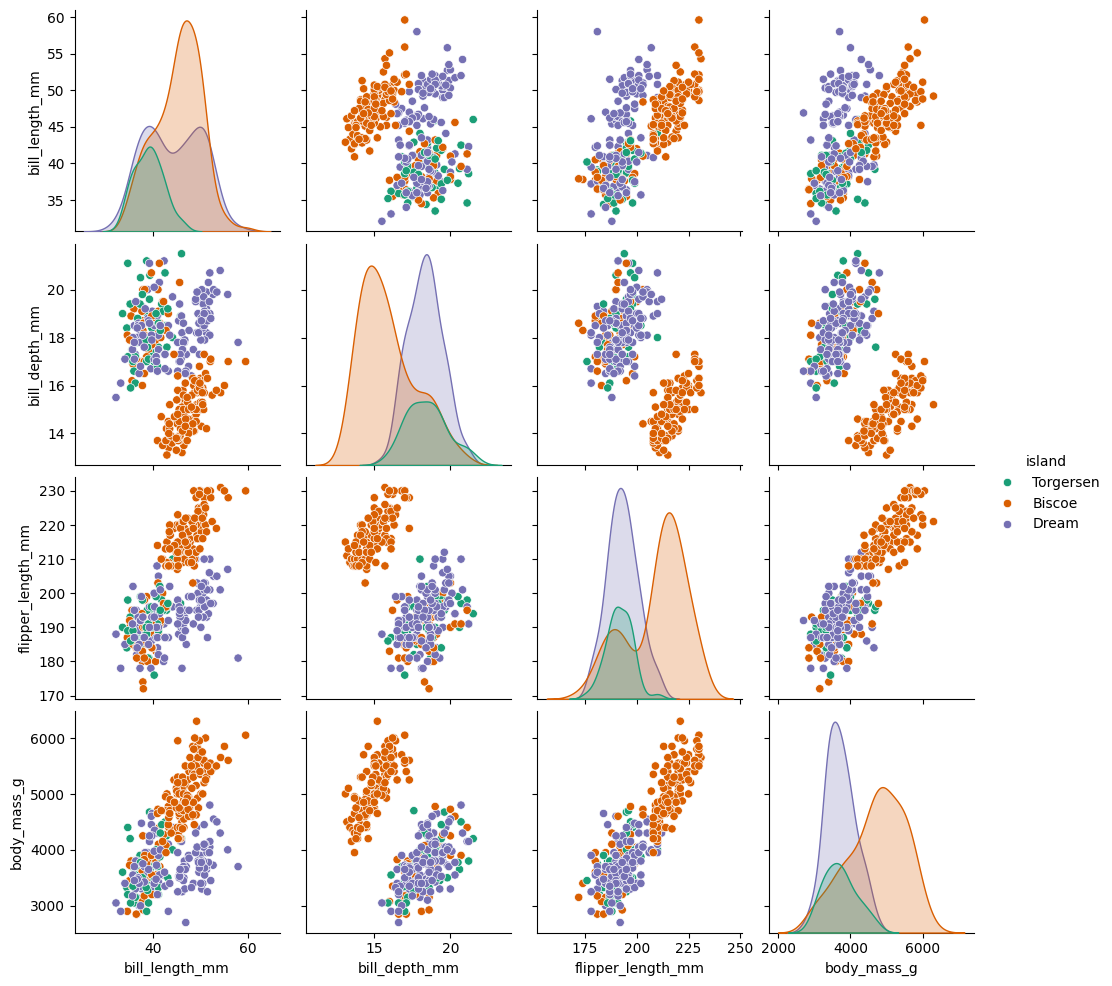

In [7]:
# descriptive statistics for the data
plt.figure(figsize=(8,6))
sns.pairplot(data=pn_clean, hue='island', palette='Dark2')
plt.show()

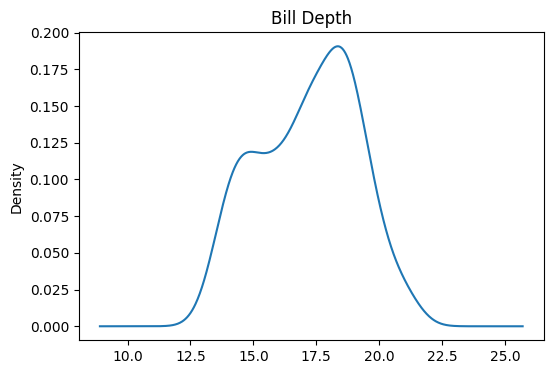

In [30]:
plt.figure(figsize=(6,4))
pn_clean['bill_depth_mm'].plot(kind='density')
plt.title('Bill Depth')
plt.show()

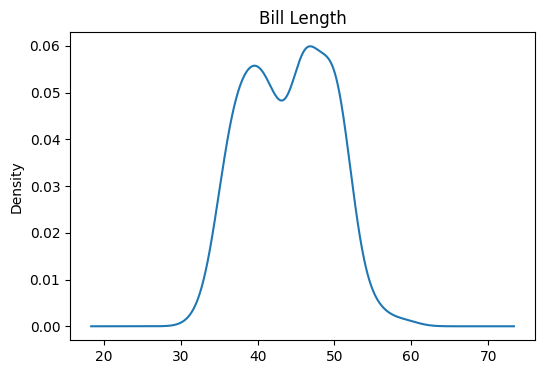

In [28]:
plt.figure(figsize=(6,4))
pn_clean['bill_length_mm'].plot(kind='density')
plt.title('Bill Length')
plt.show()

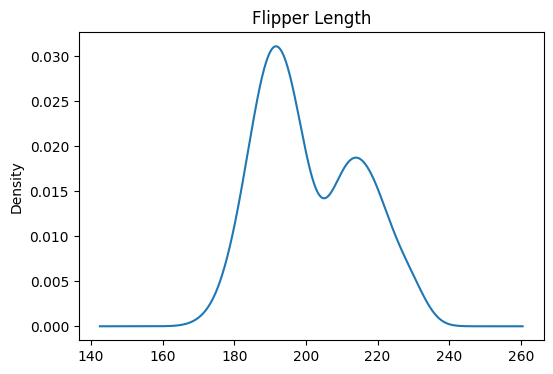

In [27]:
plt.figure(figsize=(6,4))
pn_clean['flipper_length_mm'].plot(kind='density')
plt.title('Flipper Length')
plt.show()

In [19]:
# Are penguin species independence
# chi-squared goodness of fit test

crosstab = pd.crosstab(pn_clean['species'],pn_clean['island'])
crosstab



island,Biscoe,Dream,Torgersen
species,,,
Adelie,44,55,47
Chinstrap,0,68,0
Gentoo,119,0,0


In [21]:
from scipy.stats import chi2_contingency

chi_statistic, p_value, dof,expected = chi2_contingency(crosstab)
print(p_value)


2.2818915409873682e-60


In [24]:
# print(expected)
expected = pd.DataFrame(expected,index=crosstab.index, columns=crosstab.columns)
expected

island,Biscoe,Dream,Torgersen
species,,,
Adelie,71.465465,53.927928,20.606607
Chinstrap,33.285285,25.117117,9.597598
Gentoo,58.249249,43.954955,16.795796


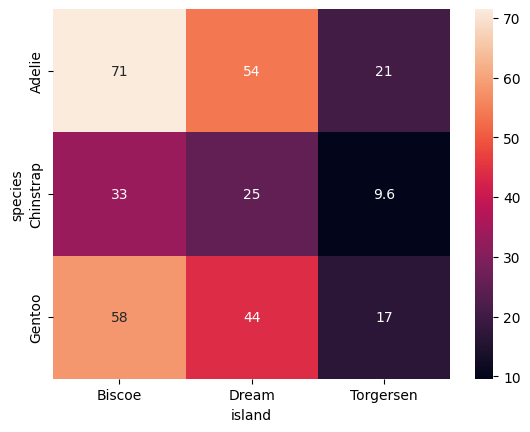

In [31]:
sns.heatmap(expected, annot=True)
plt.show()

In [33]:
# test form normality
from scipy.stats import shapiro
norm_stats, p_value = shapiro(pn_clean['bill_depth_mm'])
print(f'bill depth shapiro test value is: {p_value}')


bill depth shapiro test value is: 7.775968004513636e-06


In [34]:
# test form normality
from scipy.stats import shapiro
norm_stats, p_value = shapiro(pn_clean['bill_length_mm'])
print(f'bill length shapiro test value is: {p_value}')

bill length shapiro test value is: 1.189965972431551e-05


In [35]:
# test form normality
from scipy.stats import shapiro
norm_stats, p_value = shapiro(pn_clean['flipper_length_mm'])
print(f'flipper length shapiro test value is: {p_value}')

flipper length shapiro test value is: 5.393184873708796e-09


In [39]:
pn_clean[pn_clean['species']=='Adelie']['bill_length_mm']

0      39.1
1      39.5
2      40.3
4      36.7
5      39.3
       ... 
147    36.6
148    36.0
149    37.8
150    36.0
151    41.5
Name: bill_length_mm, Length: 146, dtype: float64

In [42]:
# penguin species - Adelie
# test form normality
from scipy.stats import shapiro
norm_stats, p_value = shapiro(pn_clean[pn_clean['species']=='Adelie']['bill_length_mm'])
print(f'Adelie Bill length shapiro test value is: {p_value}')

Adelie Bill length shapiro test value is: 0.6848410055512179


In [44]:
pn_clean['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [45]:
# penguin species - Agentoo
# test form normality
from scipy.stats import shapiro
norm_stats, p_value = shapiro(pn_clean[pn_clean['species']=='Gentoo']['bill_length_mm'])
print(f'Adelie Bill length shapiro test value is: {p_value}')

Adelie Bill length shapiro test value is: 0.019893864604223332


In [46]:
# penguin species - Agentoo
# test form normality
from scipy.stats import shapiro
norm_stats, p_value = shapiro(pn_clean[pn_clean['species']=='Chinstrap']['bill_length_mm'])
print(f'Adelie Bill length shapiro test value is: {p_value}')

Adelie Bill length shapiro test value is: 0.1940925740620773


In [49]:
# perform levene test for homogeniety - balanced variance
from scipy.stats import levene

stats, p_value = levene(pn_clean['flipper_length_mm'],pn_clean['bill_length_mm'])
print(p_value)

1.2036444598856862e-41


In [50]:
stats, p_value = levene(pn_clean['flipper_length_mm'],pn_clean['bill_depth_mm'])
print(p_value)

2.6514239839268623e-79


In [51]:
pn_clean.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [56]:
#  use non parameteric
from scipy.stats import kruskal

# use mannwitney for 2 groups and kruskal for more than 3 groups
num_value = pn_clean[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm']]

g1 = pn_clean[pn_clean['species']=='Gentoo']['bill_depth_mm']
g2 = pn_clean[pn_clean['species']=='Adelie']['bill_depth_mm']

stats, pvalue = kruskal(g1,g2)
print(pvalue)

4.025492535345622e-42


In [61]:
ddf = pd.read_csv('../dev_space/data/iris.csv')
ddf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
